In [2]:
import matplotlib.pyplot as plt
import numpy as np


# Задание 1

In [3]:
def dichotomy_method(f, a, b, eps):
    k = 0
    result = [((a + b) / 2, k, a, b)]
    while (b - a >= 2 * eps):
        y = (a + b - eps) / 2
        z = (a + b + eps) / 2
        f_y = f(y)
        f_z = f(z)
        if (f_y <= f_z):
            a_next = a
            b_next = z
        else:
            a_next = y
            b_next = b
        k += 1
        result.append(((a_next + b_next) / 2, k, a_next, b_next))
        a, b = a_next, b_next

    return result


def golden_section_search(f, a, b, eps):
    k = 0
    y = a + (3 - 5 ** 0.5) / 2 * (b - a)
    z = b - (3 - 5 ** 0.5) / 2 * (b - a)
    result = [((a + b) / 2, k, a, b)]
    while (b - a >= eps):
        f_y = f(y)
        f_z = f(z)
        if (f_y <= f_z):
            a_next = a
            b_next = z
            y_next = a + (3 - 5 ** 0.5) / 2 * (z - a)
            z_next = y
        else:
            a_next = y
            b_next = b
            y_next = z
            z_next = b - (3 - 5 ** 0.5) / 2 * (b - y)
        k += 1
        result.append(((a_next + b_next) / 2, k, a_next, b_next))
        a, b, y, z = a_next, b_next, y_next, z_next

    return result


def result(f, a, b, eps):
    d = dichotomy_method(f, a, b, eps)
    g = golden_section_search(f, a, b, eps)
    return np.array(d), np.array(g)


def function_analysis(f, a, b, eps):
    d, g = result(f, a, b, eps)
    x = np.linspace(a, b, 5000)
    y = f(x)

    print("a =", a)
    print("b =", b)
    print("eps =", eps)
    print()

    print("Метод дихотомии: x = ", d[-1][0], ', ', int(d[-1][1]), ' итераций', sep='')
    print("Метод золотого сечения: x = ", g[-1][0], ', ', int(g[-1][1]), ' итераций', sep='')

    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label='f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Найденные решения')
    plt.scatter([d[-1][0], g[-1][0]], [f(d[-1][0]), f(g[-1][0])], c='r', label='Экстремумы')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label='f(x)')
    plt.title('Метод дихотомии')
    plt.scatter(d[:, 0], f(d[:, 0]), c='r', label='Предполагаемые экстремумы')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    d_diff = d[:, 3] - d[:, 2]
    plt.plot(d[:, 1], d_diff, marker='o', label='Длина промежутка')
    plt.title('Изменение длины промежутка неопределенности')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label='f(x)')
    plt.title('Метод золотого сечения')
    plt.scatter(g[:, 0], f(g[:, 0]), c='r', label='Предполагаемые экстремумы')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    g_diff = g[:, 3] - g[:, 2]
    plt.plot(g[:, 1], g_diff, marker='o', label='Длина промежутка')
    plt.title('Изменение длины промежутка неопределенности')
    plt.legend()
    plt.grid(True)
    plt.show()


# Функция f(x) = x - x ** 3 / 6 + x ** 5 / 120

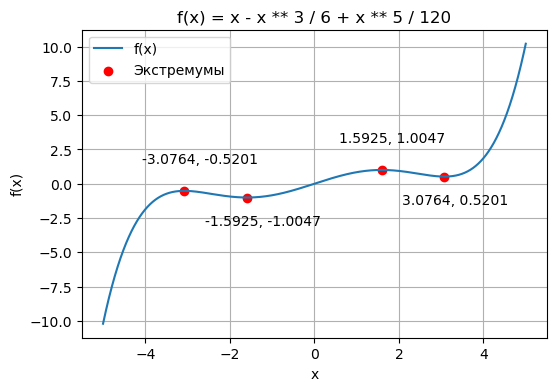

In [4]:
f = lambda x: x - x ** 3 / 6 + x ** 5 / 120
x = np.linspace(-5, 5, 5000)
y = f(x)

x1 = -np.sqrt(6 + 2 * np.sqrt(3))  #-3.076378002641703
x2 = -np.sqrt(6 - 2 * np.sqrt(3))  #-1.5924504340362515
x3 = np.sqrt(6 - 2 * np.sqrt(3))  #1.5924504340362515
x4 = np.sqrt(6 + 2 * np.sqrt(3))  #3.076378002641703

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='f(x)')
plt.scatter([x1, x2, x3, x4], [f(x1), f(x2), f(x3), f(x4)], c='r', label='Экстремумы')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("f(x) = x - x ** 3 / 6 + x ** 5 / 120")
plt.text(x1 - 1, f(x1) + 2, f'{round(x1, 4)}, {round(f(x1), 4)}')
plt.text(x2 - 1, f(x2) - 2, f'{round(x2, 4)}, {round(f(x2), 4)}')
plt.text(x3 - 1, f(x3) + 2, f'{round(x3, 4)}, {round(f(x3), 4)}')
plt.text(x4 - 1, f(x4) - 2, f'{round(x4, 4)}, {round(f(x4), 4)}')
plt.legend()
plt.grid(True)
plt.show()


a = -3
b = 1
eps = 0.001

Метод дихотомии: x = -1.592137084960938, 12 итераций
Метод золотого сечения: x = -1.5923897842315509, 18 итераций


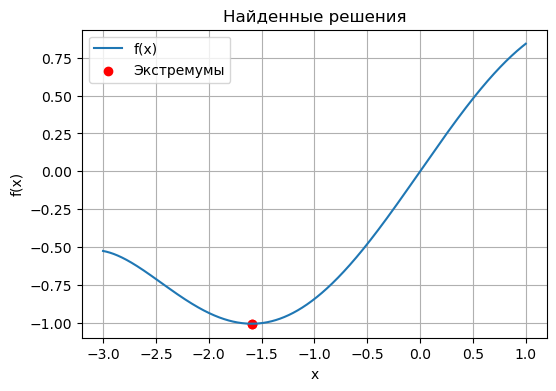

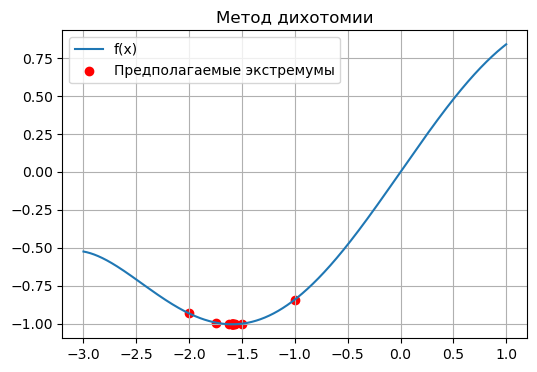

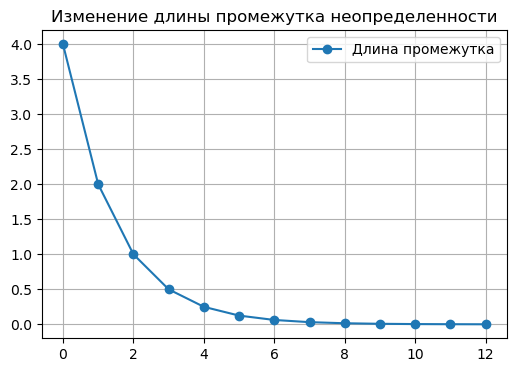

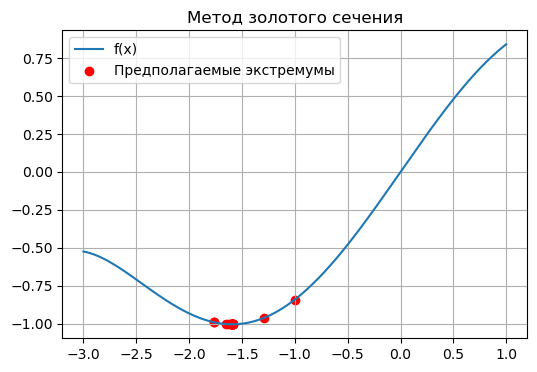

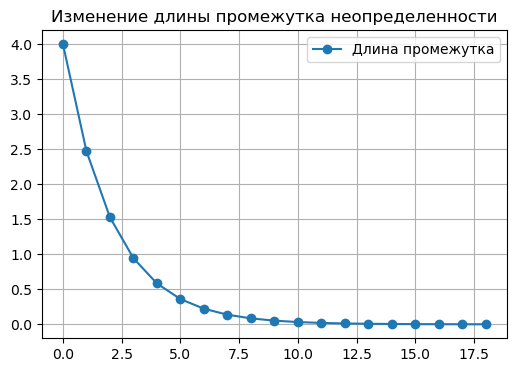

In [5]:
function_analysis(f=lambda x: x - x ** 3 / 6 + x ** 5 / 120,
                  a=-3,
                  b=1,
                  eps=0.001)


a = 1.6
b = 4
eps = 0.001

Метод дихотомии: x = 3.0761544189453125, 12 итераций
Метод золотого сечения: x = 3.076579493914003, 17 итераций


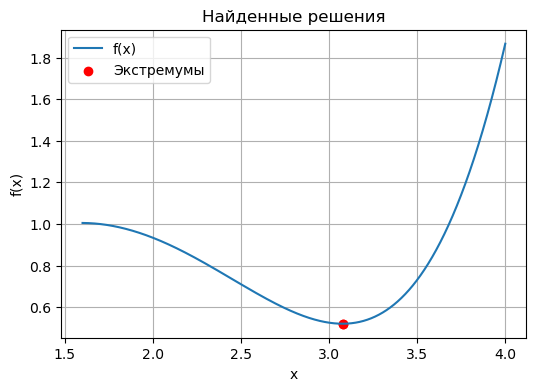

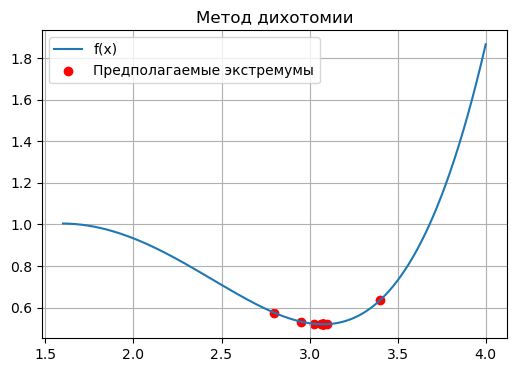

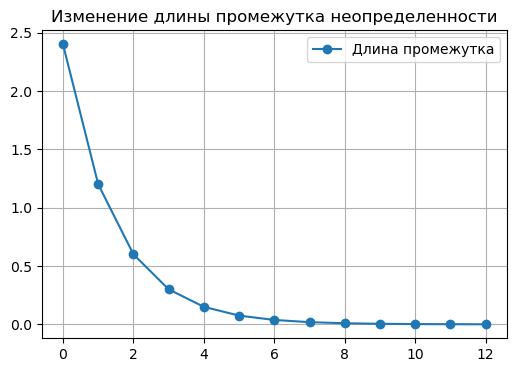

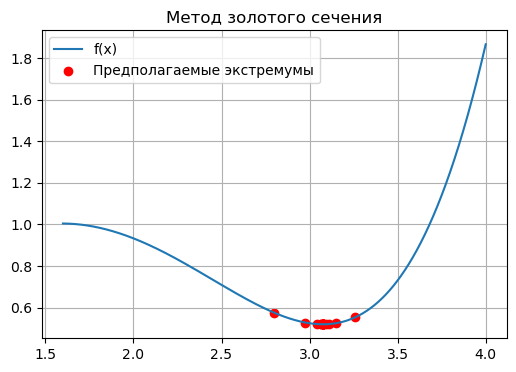

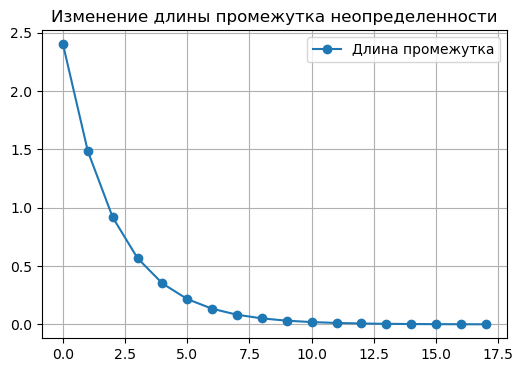

In [6]:
function_analysis(f=lambda x: x - x ** 3 / 6 + x ** 5 / 120,
                  a=1.6,
                  b=4,
                  eps=0.001)


a = 6
b = 10
eps = 0.001

Метод дихотомии: x = 6.000988159179688, 12 итераций
Метод золотого сечения: x = 6.000346140543424, 18 итераций


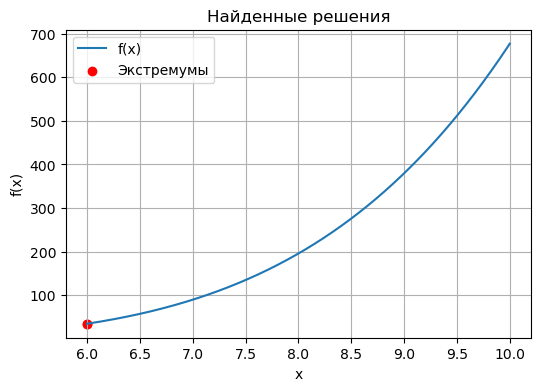

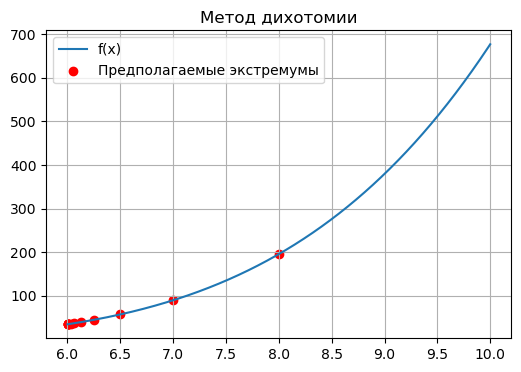

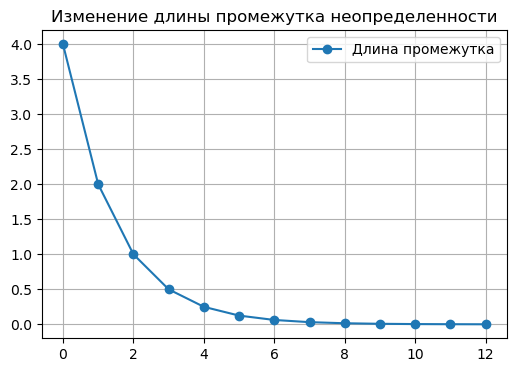

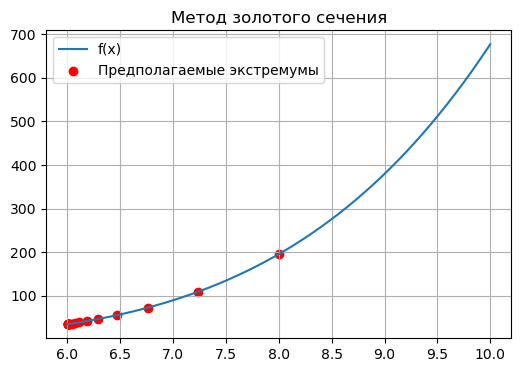

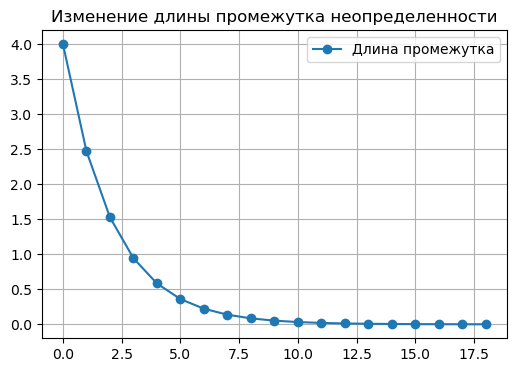

In [7]:
function_analysis(f=lambda x: x - x ** 3 / 6 + x ** 5 / 120,
                  a=6,
                  b=10,
                  eps=0.001)


a = -3
b = 6
eps = 0.001

Метод дихотомии: x = -1.5925823669433594, 14 итераций
Метод золотого сечения: x = -1.5925034119870962, 19 итераций


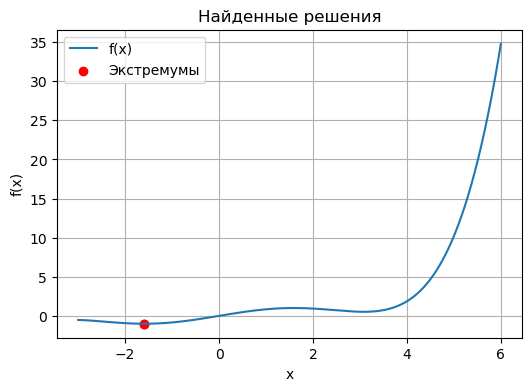

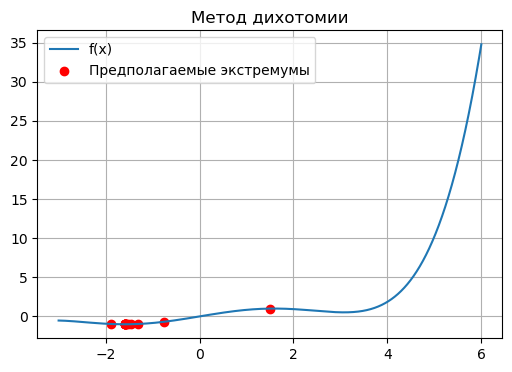

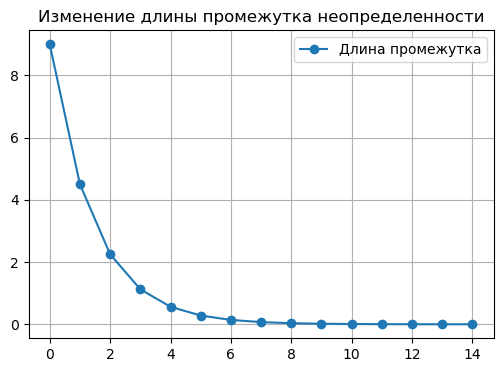

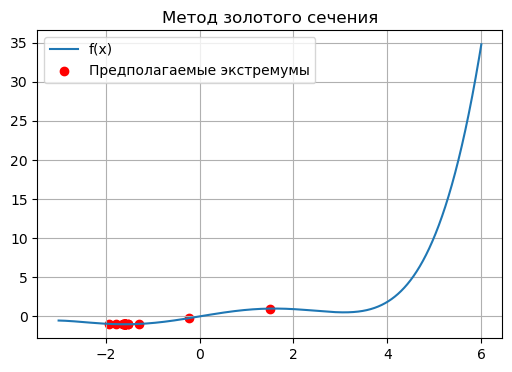

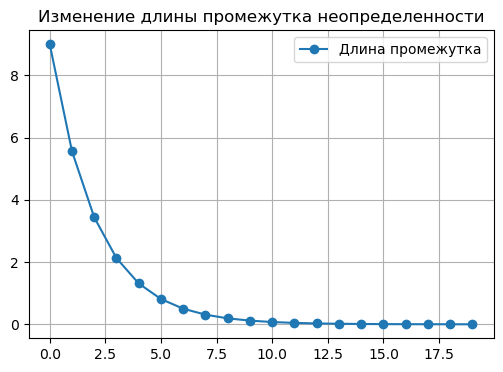

In [8]:
function_analysis(f=lambda x: x - x ** 3 / 6 + x ** 5 / 120,
                  a=-3,
                  b=6,
                  eps=0.001)


# Функция f(x) = sin(0.5 * x + 1) + 9

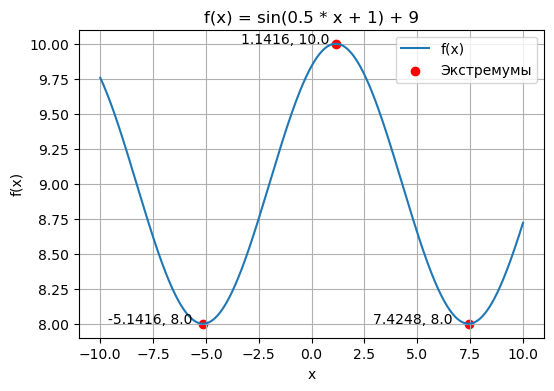

In [9]:
f = lambda x: np.sin(0.5 * x + 1) + 9
x = np.linspace(-10, 10, 5000)
y = f(x)

x1 = 1.14159
x2 = 1.14159 + 2 * np.pi  #7.424775307179586
x3 = 1.14159 - 2 * np.pi  #-5.141595307179586

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='f(x)')
plt.scatter([x1, x2, x3], [f(x1), f(x2), f(x3)], c='r', label='Экстремумы')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("f(x) = sin(0.5 * x + 1) + 9")
plt.text(x1 - 4.5, f(x1), f'{round(x1, 4)}, {round(f(x1), 4)}')
plt.text(x2 - 4.5, f(x2), f'{round(x2, 4)}, {round(f(x2), 4)}')
plt.text(x3 - 4.5, f(x3), f'{round(x3, 4)}, {round(f(x3), 4)}')
plt.legend()
plt.grid(True)
plt.show()


a = -7
b = 0
eps = 0.001

Метод дихотомии: x = -5.141672180175782, 13 итераций
Метод золотого сечения: x = -5.141694549588734, 19 итераций


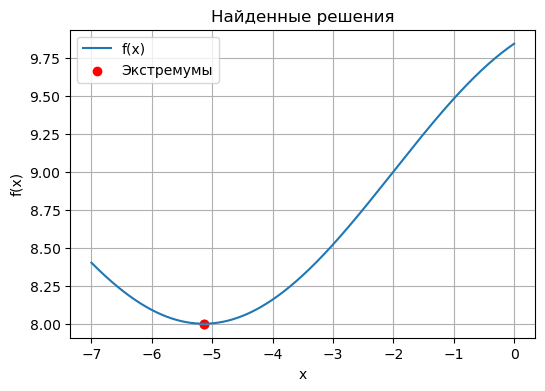

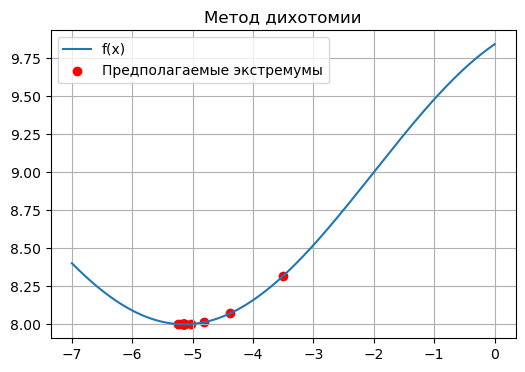

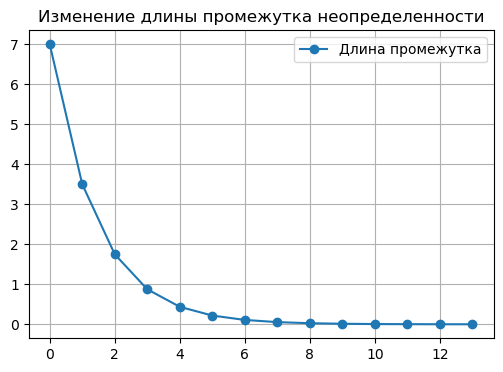

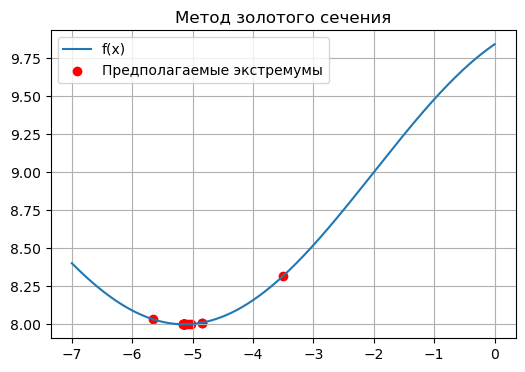

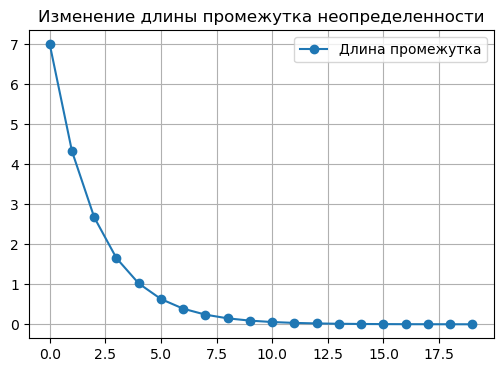

In [10]:
function_analysis(f=lambda x: np.sin(0.5 * x + 1) + 9,
                  a=-7,
                  b=0,
                  eps=0.001)


a = -7
b = 0
eps = 1e-07

Метод дихотомии: x = -5.141592669132475, 27 итераций
Метод золотого сечения: x = -5.1415927294624595, 38 итераций


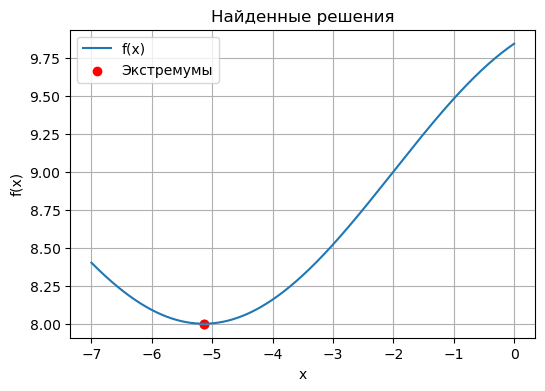

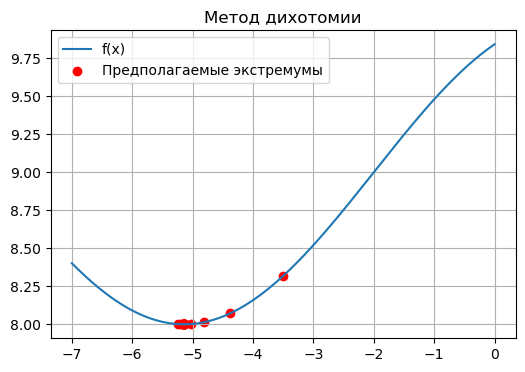

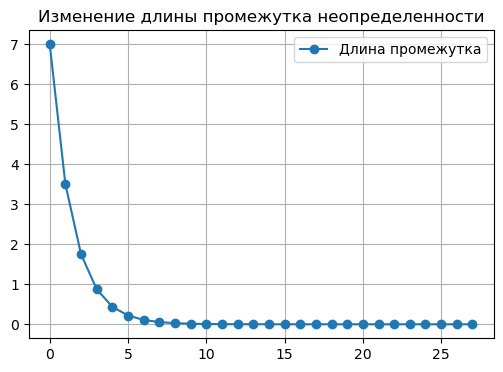

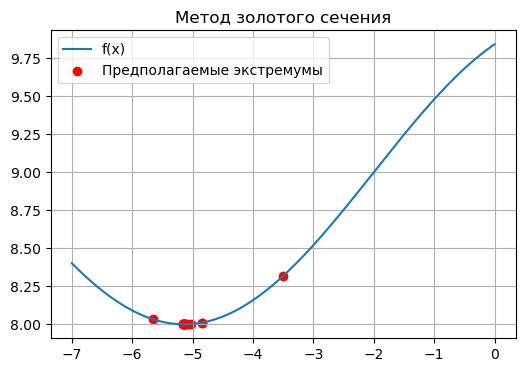

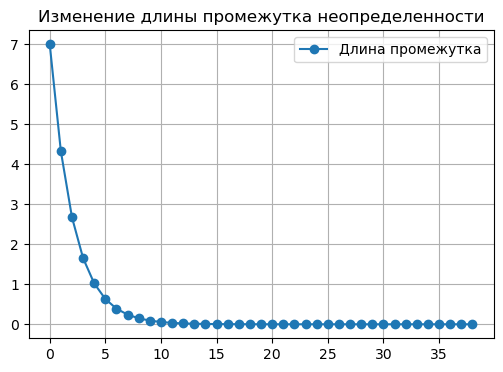

In [11]:
function_analysis(f=lambda x: np.sin(0.5 * x + 1) + 9,
                  a=-7,
                  b=0,
                  eps=0.0000001)


a = 2
b = 13
eps = 1e-07

Метод дихотомии: x = 7.424777929423623, 27 итераций
Метод золотого сечения: x = 7.424777889370016, 39 итераций


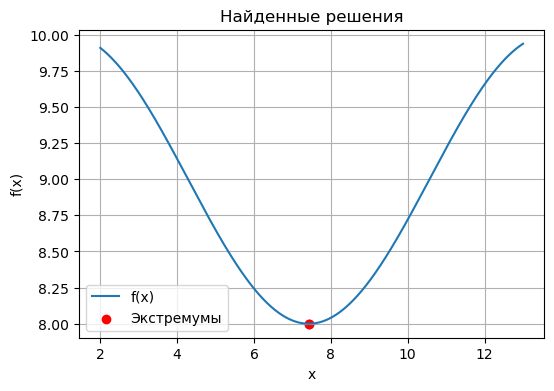

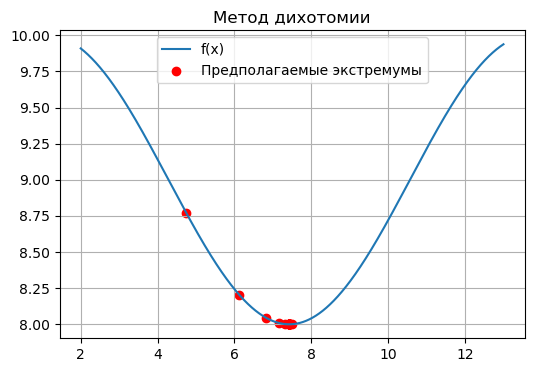

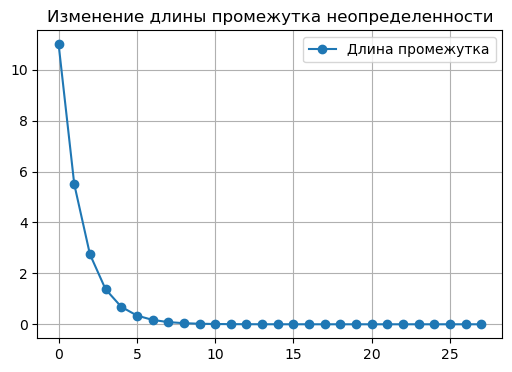

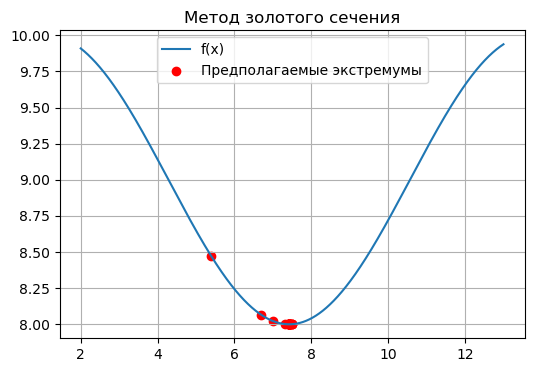

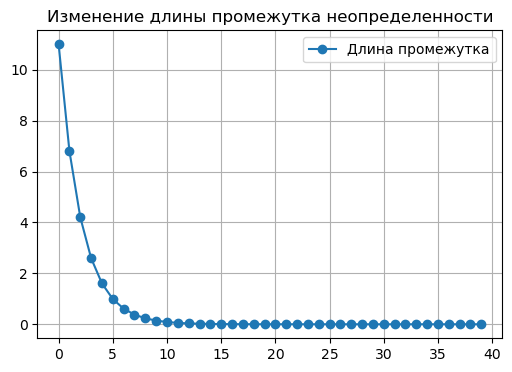

In [12]:
function_analysis(f=lambda x: np.sin(0.5 * x + 1) + 9,
                  a=2,
                  b=13,
                  eps=0.0000001)


# Задание 2

In [13]:
def bisection_method(f, a, b, eps, max_iter=1000):
    if f(a) * f(b) > 0:
        print("Корня на заданном интервале нет")
        print()
        return []

    results = []
    k = 0
    left, right = a, b

    mid = (left + right) / 2
    results.append((mid, k, left, right))

    while (right - left) >= eps and k < max_iter:
        mid = (left + right) / 2
        if f(left) * f(mid) <= 0:
            right = mid
        else:
            left = mid

        k += 1
        results.append(((left + right) / 2, k, left, right))

    return np.array(results)


def calculate_sko(x_star, true_root):
    return np.sqrt(np.mean((x_star - true_root) ** 2))


def function_root_analysis(f, a, b, eps, true_root):
    steps = bisection_method(f, a, b, eps)

    if len(steps) == 0:
        return

    x_star, iter_num, left_end, right_end = steps[-1]

    print(f"a = {a}")
    print(f"b = {b}")
    print(f"eps = {eps}")
    print(f"Метод бисекции: x = {x_star}, {int(iter_num)} итераций")

    sko = calculate_sko(x_star, true_root)
    print(f"СКО: {sko}\n")

    x = np.linspace(a, b, 5000)
    y = f(x)

    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label='f(x)')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.scatter(x_star, f(x_star), color='red', label='Корень')
    plt.title("Нахождение корня методом бисекции")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

    interval_lengths = steps[:, 3] - steps[:, 2]
    iters = steps[:, 1]

    plt.figure(figsize=(6, 4))
    plt.plot(interval_lengths, iters, marker='o')
    plt.title("Зависимость числа итераций от промежутков")
    plt.xlabel("Длина промежутка")
    plt.ylabel("Количество итераций")
    plt.grid(True)
    plt.show()


# Функция f(x) = x ** 2 - 2

a = -3
b = 1
eps = 0.001
Метод бисекции: x = -1.41455078125, 12 итераций
СКО: 0.0003372188769048545



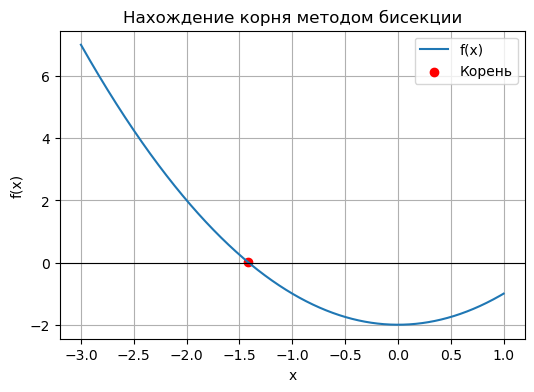

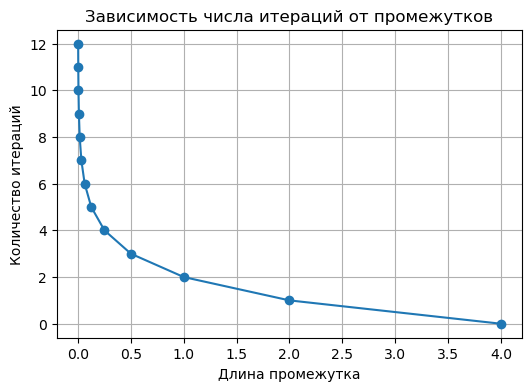

In [14]:
function_root_analysis(f=lambda x: x ** 2 - 2,
                       a=-3,
                       b=1,
                       eps=0.001,
                       true_root=(-1) * np.sqrt(2))


# Функция f(x) = exp(x) - 1

a = -1
b = 1
eps = 1e-05
Метод бисекции: x = -3.814697265625e-06, 18 итераций
СКО: 3.814697265625e-06



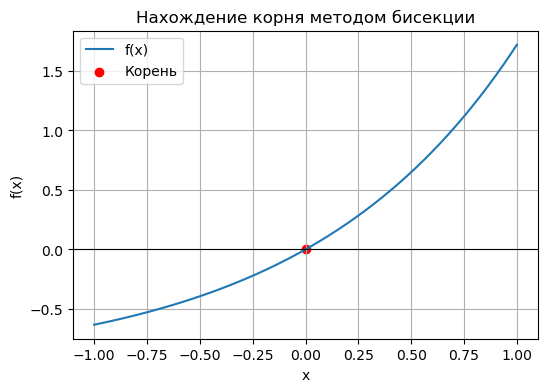

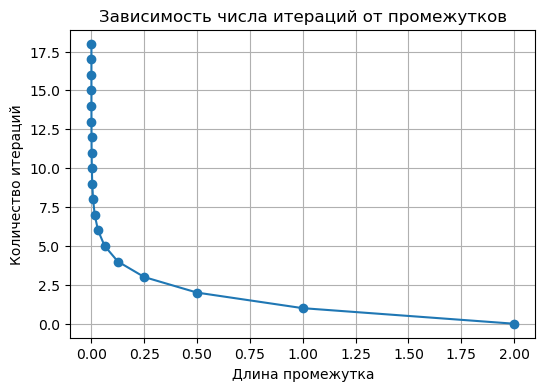

In [15]:
function_root_analysis(f=lambda x: np.exp(x) - 1,
                       a=-1,
                       b=1,
                       eps=1e-5,
                       true_root=0)
